#Fashion MNIST competition

Коллаб подготовлен магистрантом 1 курса УрФУ Зайцевым Александром Васильевичем  
Группа: РИМ-120962

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

print(tf.__version__)

2.12.0


In [ ]:
!pip install keract

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import plot_model
from tensorflow.keras import backend as K
from tensorflow.keras import activations
from keract import get_activations, display_activations
import cv2

In [ ]:
# Различные константы
IMG_WIDTH, IMG_HEIGHT = 28, 28
BATCH_SIZE = 250
EPOCHS = 15
NUM_CLASSES = 10
VALIDATION_SPLIT = 0.1
VERBOSITY = 1

In [ ]:
mnist_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/fmnist_train.csv')
mnist_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/fmnist_test.csv')

In [ ]:
count_nan = mnist_train.isna().sum().sum()
count_nan

424

In [ ]:
count_nan1 = mnist_test.isna().sum().sum()
count_nan1

0

In [ ]:
mnist_train = mnist_train.fillna(0)

In [ ]:
train_labels = mnist_train['label']
train_labels.shape

(17040,)

In [ ]:
mnist_train.shape

(17040, 786)

In [ ]:
mnist_train = mnist_train.drop(columns = ['label', 'Id'], axis = 1)

In [ ]:
mnist_train = mnist_train.values

In [ ]:
mnist_train.shape

(17040, 784)

In [ ]:
mnist_test = mnist_test.drop(columns = ['Id'], axis = 1)

In [ ]:
mnist_train[0].shape

(784,)

In [ ]:
mnist_train = mnist_train.reshape(17040, IMG_WIDTH, IMG_HEIGHT)

In [ ]:
mnist_train.shape

(17040, 28, 28)

In [ ]:
mnist_test = mnist_test.values

In [ ]:
mnist_test = mnist_test.reshape(10000, IMG_WIDTH, IMG_HEIGHT)

In [ ]:
mnist_test.shape

(10000, 28, 28)

In [ ]:
# Подготавливаем данные.
mnist_train = mnist_train.reshape(mnist_train.shape[0], IMG_WIDTH, IMG_HEIGHT, 1)
mnist_test = mnist_test.reshape(mnist_test.shape[0], IMG_WIDTH, IMG_HEIGHT, 1)
input_shape = (IMG_WIDTH, IMG_HEIGHT, 1)

In [ ]:
mnist_test.shape, mnist_train.shape, input_shape

((10000, 28, 28, 1), (17040, 28, 28, 1), (28, 28, 1))

In [ ]:
# Нормализуем данные (0-255 -> 0-1.0).
mnist_train = mnist_train.astype('float32')
mnist_test = mnist_test.astype('float32')
mnist_train = mnist_train / 255
mnist_test = mnist_test / 255

In [ ]:
train_labels = train_labels.values
train_labels

array([2, 9, 6, ..., 4, 6, 5])

In [ ]:
train_labels = tensorflow.keras.utils.to_categorical(train_labels, NUM_CLASSES)

In [ ]:
train_labels[0]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Модель

In [ ]:
model = Sequential()

model.add(Conv2D(64, (5, 5),
                      padding="same",
                      activation="relu",
                      input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (5, 5), padding="same",
                      activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, (5, 5), padding="same",
                      activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [ ]:
# И обучаем её.
model.compile(
    loss=tensorflow.keras.losses.categorical_crossentropy,
    optimizer=tensorflow.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# callback для сохранения результатов обучения в формате Keras (h5) после каждой эпохи обучения.
callbacks = [
    tensorflow.keras.callbacks.ModelCheckpoint("drive/MyDrive/3_classification_keras_mnist_deep_dive/cnn_mnist_classification_epochs/epoch_{epoch}.h5")
]

model_history = model.fit(
    mnist_train,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=callbacks,
    verbose=VERBOSITY,
    validation_split=VALIDATION_SPLIT
)

Epoch 1/15
62/62 [==============================] - 10s 77ms/step - loss: 0.8312 - accuracy: 0.6922 - val_loss: 0.5429 - val_accuracy: 0.7964
Epoch 2/15
62/62 [==============================] - 3s 43ms/step - loss: 0.4634 - accuracy: 0.8264 - val_loss: 0.4397 - val_accuracy: 0.8445
Epoch 3/15
62/62 [==============================] - 3s 44ms/step - loss: 0.3679 - accuracy: 0.8652 - val_loss: 0.3701 - val_accuracy: 0.8621
Epoch 4/15
62/62 [==============================] - 3s 42ms/step - loss: 0.3189 - accuracy: 0.8833 - val_loss: 0.3611 - val_accuracy: 0.8750
Epoch 5/15
62/62 [==============================] - 3s 48ms/step - loss: 0.2814 - accuracy: 0.8946 - val_loss: 0.3037 - val_accuracy: 0.8879
Epoch 6/15
62/62 [==============================] - 3s 44ms/step - loss: 0.2435 - accuracy: 0.9106 - val_loss: 0.2994 - val_accuracy: 0.8873
Epoch 7/15
62/62 [==============================] - 3s 44ms/step - loss: 0.2225 - accuracy: 0.9171 - val_loss: 0.2980 - val_accuracy: 0.8944
Epoch 8/15
6

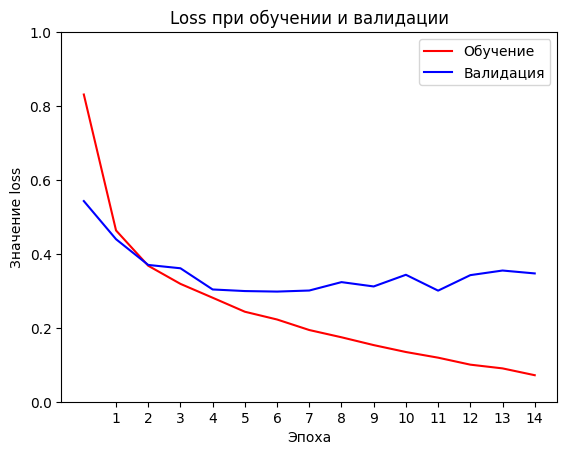

In [ ]:
import matplotlib.pyplot as plt

loss = model_history.history["loss"]
val_loss = model_history.history["val_loss"]

plt.figure()
plt.plot(model_history.epoch, loss, "r", label="Обучение")
plt.plot(model_history.epoch, val_loss, "b", label="Валидация")
plt.title("Loss при обучении и валидации")
plt.xlabel("Эпоха")
plt.xticks(range(1, EPOCHS))
plt.ylabel("Значение loss")
plt.ylim([0, 1])
plt.legend()
plt.show()

In [ ]:
predictions = np.argmax(model.predict(mnist_test), axis=-1)

313/313 [==============================] - 1s 3ms/step


In [ ]:
predictions = pd.DataFrame(predictions)

In [ ]:
predictions['Id'] = predictions.reset_index()['index']

In [ ]:
predictions = predictions.rename(columns = {0:'Category'})

In [ ]:
predictions = predictions.reindex(columns=['Id', 'Category'])

In [ ]:
predictions.to_csv(r' C:\Пользователи\lalok\Ответ5.csv', index= False)

In [ ]:
predictions.head(20)

,Id,Category
0,0,0
1,1,1
2,2,2
3,3,6
4,4,3
5,5,6
6,6,8
7,7,4
8,8,5
9,9,0
